<a href="https://colab.research.google.com/github/swethakannan02/EARTHQUAKE_PREDICTION/blob/main/EarthquakePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("earthquake.csv")

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-04T11:38:17.699Z,35.251000,-98.046667,5.39000,2.74,ml,94.0,48.00,0.040492,0.2100,...,2023-05-04T14:11:33.012Z,"10 km NW of Pocasset, Oklahoma",earthquake,NaN,0.400000,0.250000,45.0,reviewed,ok,ok
1,2023-05-04T11:08:48.290Z,18.486667,-67.413500,17.35000,2.83,md,8.0,246.00,0.119300,0.1200,...,2023-05-04T11:43:12.250Z,NaN,earthquake,0.780000,0.410000,0.026201,4.0,reviewed,pr,pr
2,2023-05-04T10:13:34.790Z,19.188667,-155.488007,5.68000,2.74,ml,36.0,153.00,NaN,0.1800,...,2023-05-04T10:19:05.660Z,"1 km SSW of P?hala, Hawaii",earthquake,0.510000,0.600000,2.030000,21.0,automatic,hv,hv
3,2023-05-04T10:06:01.978Z,10.447100,125.141200,10.00000,4.80,mb,56.0,122.00,3.384000,1.0100,...,2023-05-04T10:59:15.682Z,"9 km SSW of Silago, Philippines",earthquake,5.930000,1.886000,0.058000,93.0,reviewed,us,us
4,2023-05-04T09:52:50.400Z,63.667500,-19.118700,10.00000,4.50,mb,49.0,113.00,1.452000,0.7300,...,2023-05-04T10:16:10.040Z,"55 km E of Hvolsvöllur, Iceland",earthquake,10.420000,1.934000,0.054000,100.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2022-08-01T20:21:48.319Z,40.164200,-119.628400,7.80000,2.70,ml,18.0,65.79,0.080000,0.1485,...,2022-10-12T14:49:40.040Z,"23 km N of Sutcliffe, Nevada",earthquake,NaN,1.700000,0.270000,10.0,reviewed,nn,nn
19996,2022-08-01T19:54:34.131Z,-6.200400,130.010800,142.49100,4.40,mb,18.0,98.00,2.184000,0.9600,...,2022-10-12T14:51:20.040Z,Banda Sea,earthquake,9.360000,11.667000,0.220000,6.0,reviewed,us,us
19997,2022-08-01T19:41:40.886Z,53.471400,-165.349200,35.00000,3.00,ml,21.0,221.00,0.702000,0.3200,...,2022-10-12T14:52:20.040Z,"78 km SSE of Akutan, Alaska",earthquake,3.480000,2.000000,0.105000,12.0,reviewed,us,us
19998,2022-08-01T19:20:58.670Z,19.242333,-155.387333,33.44000,3.70,ml,51.0,141.00,NaN,0.1300,...,2022-10-12T14:49:39.040Z,"10 km ENE of P?hala, Hawaii",earthquake,0.450000,0.550000,0.156217,39.0,reviewed,hv,hv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             20000 non-null  object 
 1   latitude         20000 non-null  float64
 2   longitude        20000 non-null  float64
 3   depth            20000 non-null  float64
 4   mag              20000 non-null  float64
 5   magType          20000 non-null  object 
 6   nst              18660 non-null  float64
 7   gap              18660 non-null  float64
 8   dmin             17650 non-null  float64
 9   rms              19999 non-null  float64
 10  net              20000 non-null  object 
 11  id               20000 non-null  object 
 12  updated          20000 non-null  object 
 13  place            18813 non-null  object 
 14  type             20000 non-null  object 
 15  horizontalError  18507 non-null  float64
 16  depthError       19999 non-null  float64
 17  magError    

PREPROCESSING THE DATA

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].apply(lambda x: int(x.timestamp()))
df['time']

0        1683200297
1        1683198528
2        1683195214
3        1683194761
4        1683193970
            ...    
19995    1659385308
19996    1659383674
19997    1659382900
19998    1659381658
19999    1659380919
Name: time, Length: 20000, dtype: int64

In [ ]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1340
gap                1340
dmin               2350
rms                   1
net                   0
id                    0
updated               0
place              1187
type                  0
horizontalError    1493
depthError            1
magError           1538
magNst             1462
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 3 to 19999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             16168 non-null  int64  
 1   latitude         16168 non-null  float64
 2   longitude        16168 non-null  float64
 3   depth            16168 non-null  float64
 4   mag              16168 non-null  float64
 5   magType          16168 non-null  object 
 6   nst              16168 non-null  float64
 7   gap              16168 non-null  float64
 8   dmin             16168 non-null  float64
 9   rms              16168 non-null  float64
 10  net              16168 non-null  object 
 11  id               16168 non-null  object 
 12  updated          16168 non-null  object 
 13  place            16168 non-null  object 
 14  type             16168 non-null  object 
 15  horizontalError  16168 non-null  float64
 16  depthError       16168 non-null  float64
 17  magError    

In [ ]:
df=df.drop(['magType','net','id','updated','place','type','status','locationSource','magSource'],axis=1)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 3 to 19999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             16168 non-null  int64  
 1   latitude         16168 non-null  float64
 2   longitude        16168 non-null  float64
 3   depth            16168 non-null  float64
 4   mag              16168 non-null  float64
 5   nst              16168 non-null  float64
 6   gap              16168 non-null  float64
 7   dmin             16168 non-null  float64
 8   rms              16168 non-null  float64
 9   horizontalError  16168 non-null  float64
 10  depthError       16168 non-null  float64
 11  magError         16168 non-null  float64
 12  magNst           16168 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.7 MB


IMPORTANCE OF FEATURES


In [ ]:
from sklearn.linear_model import LinearRegression
x = df.drop(["mag"] ,axis=1)
y = df["mag"]
model = LinearRegression()
model.fit(x, y)
importance = model.coef_
indices = importance.argsort()[::-1]
for i in indices:
    print(x.columns[i], ":", importance[i])

rms : 0.7088268789466559
horizontalError : 0.04530336800969181
dmin : 0.011807265502694557
nst : 0.008592253756205152
longitude : 0.0015585538624650012
depthError : 0.0011791326971563464
time : -1.2961713886934054e-10
magNst : -8.626559824369642e-05
depth : -0.0005661912736270806
gap : -0.0011165181501285489
latitude : -0.008792565820184745
magError : -0.14743830956507767


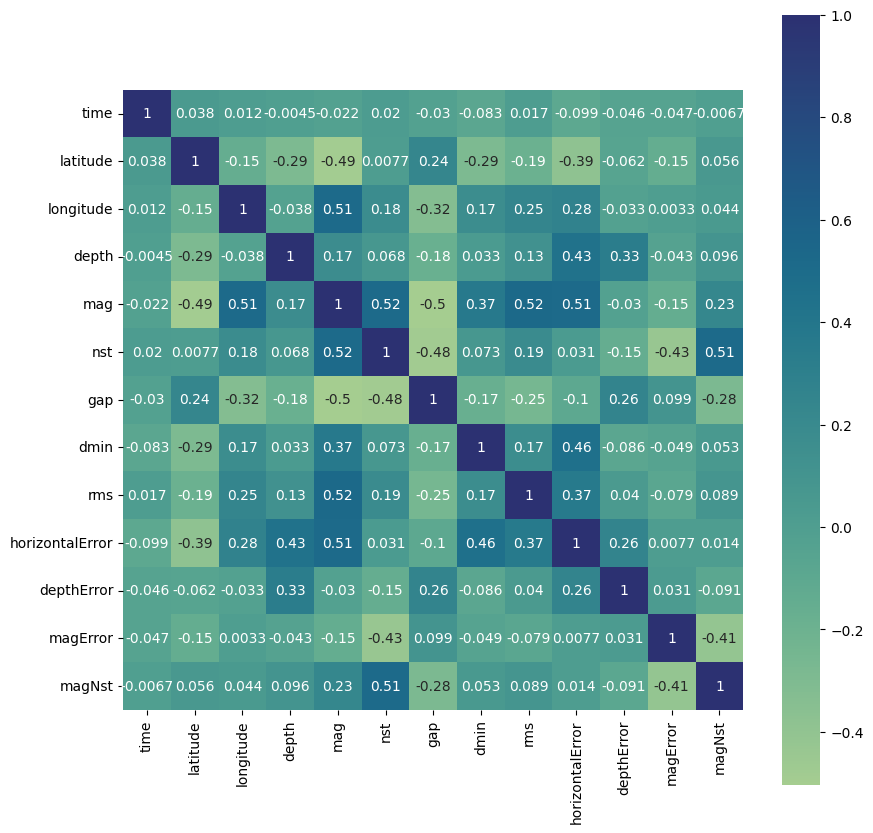

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="crest",square=True)
plt.gcf().set_size_inches(10, 10)
plt.show ()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df.drop(["mag"] ,axis=1)
y = df["mag"]
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(x, y)
ranks = rfe.ranking_
print(ranks)

[8 2 4 6 1 5 1 1 1 3 1 7]


In [ ]:
selected_features = rfe.support_
rfe_ranking = rfe.ranking_
feature_names = x.columns
features_ranked = sorted(zip(map(lambda x: round(x, 4), rfe_ranking), feature_names))
for rank, feature in features_ranked:
    print(f"Rank: {rank} - Feature: {feature}")

Rank: 1 - Feature: dmin
Rank: 1 - Feature: horizontalError
Rank: 1 - Feature: magError
Rank: 1 - Feature: nst
Rank: 1 - Feature: rms
Rank: 2 - Feature: latitude
Rank: 3 - Feature: depthError
Rank: 4 - Feature: longitude
Rank: 5 - Feature: gap
Rank: 6 - Feature: depth
Rank: 7 - Feature: magNst
Rank: 8 - Feature: time


SPLITTING THE DATA


In [ ]:
df

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
3,1683194761,10.447100,125.141200,10.00000,4.80,56.0,122.0,3.384000,1.01,5.930000,1.886000,0.058,93.0
4,1683193970,63.667500,-19.118700,10.00000,4.50,49.0,113.0,1.452000,0.73,10.420000,1.934000,0.054,100.0
6,1683189632,-29.597300,-177.079300,35.00000,4.80,33.0,120.0,0.806000,0.46,4.760000,1.931000,0.100,31.0
7,1683189139,18.621800,-68.769100,163.00000,4.13,13.0,138.0,0.402400,0.66,4.750000,2.610000,0.130,10.0
9,1683187331,54.093900,-162.771000,35.00000,4.00,82.0,156.0,0.852000,0.70,6.400000,1.961000,0.102,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,1659387338,-58.179500,-23.730500,10.00000,4.70,47.0,52.0,16.023000,1.07,10.890000,1.564000,0.093,35.0
19994,1659387183,18.572400,146.683400,33.31900,4.20,25.0,97.0,5.253000,1.24,13.780000,4.625000,0.152,12.0
19996,1659383674,-6.200400,130.010800,142.49100,4.40,18.0,98.0,2.184000,0.96,9.360000,11.667000,0.220,6.0
19997,1659382900,53.471400,-165.349200,35.00000,3.00,21.0,221.0,0.702000,0.32,3.480000,2.000000,0.105,12.0


In [ ]:

x = df[["time", "latitude", "longitude", "depth", "nst", "gap", "dmin", "rms"]]
y = df["mag"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# LINEAR REGRESSION


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
mse1=mean_squared_error(y_test,y_pred)
r21 = r2_score(y_test, y_pred)
print("mse=",mse1)
print("r2=",r21)

mse= 0.1831831824153392
r2= 0.7332667471115051


time = "2023-05-04T11:38:17.699Z", latitude = 35.251, longitude = -98.04666667, depth = 5.39, nst = 94, gap = 48, dmin = 0.040492054, rms = 0.21

In [ ]:
new_data = [[1670170697.699,35.251, -98.04666667, 5.39, 94, 48, 0.040492054, 0.21]]
predicted_mag = model.predict(new_data)
print("Predicted magnitude:", predicted_mag)

Predicted magnitude: [3.77070405]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)
mse5 = mean_squared_error(y_test, y_pred)
r25 = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse5)
print('R^2 Score: ', r25)


Mean Squared Error:  0.1570752038633357
R^2 Score:  0.7712826061750815


# SUPPORT VECTOR REGRESSOR (SVR)


In [ ]:
from sklearn.svm import SVR
model = SVR()

In [ ]:
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
mse2= mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse2)
print('R^2 Score: ', r22)

Mean Squared Error:  0.08377713468594901
R^2 Score:  0.8780120131235938


In [ ]:
new_data = [[1670170697.699,35.251, -98.04666667, 5.39, 94, 48, 0.040492054, 0.21]]
predicted_mag = model.predict(new_data)
print("Predicted magnitude:", predicted_mag)

Predicted magnitude: [4.36194882]


# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse3)
print('R^2 Score: ', r23)

Mean Squared Error:  0.07946221383436397
R^2 Score:  0.8842949745806674


In [ ]:
new_data = [[1670170697.699,35.251, -98.04666667, 5.39, 94, 48, 0.040492054, 0.21]]
predicted_mag = model.predict(new_data)
print("Predicted magnitude:", predicted_mag)

Predicted magnitude: [4.36194882]


# DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse4= mean_squared_error(y_test, y_pred)
r24 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse4)
print('R^2 Score: ', r24)

Mean Squared Error:  0.14127815874064004
R^2 Score:  0.7942847026341837


In [ ]:
new_data = [[1670170697.699,35.251, -98.04666667, 5.39, 94, 48, 0.040492054, 0.21]]
predicted_mag = model.predict(new_data)
print("Predicted magnitude:", predicted_mag)

Predicted magnitude: [3.2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


GRADIENT BOOSTING REGRESSION


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse5 = mean_squared_error(y_test, y_pred)
r25 = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse5)
print('R-squared:', r25)


Mean Squared Error: 0.08005108972503393
R-squared: 0.883437511685903


xgboost


In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}
model = xgb.train(params, dtrain)
y_pred = model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.08622708142991202
R-squared: 0.8744446427143432


In [ ]:
scores = {"Model name": ["Linear regression", "Polynomial Regression", "SVM", "Random Forest", "Decision Tree","Gradient Boosting Regressor","XGBoost"], "mse": [], "R^2": []}
scores['mse'].extend([mse1, mse5, mse2, mse3, mse4,mse5,mse])
scores['R^2'].extend([r21, r25, r22, r23, r24,r25,r2])
scores_df = pd.DataFrame(scores)
print(scores_df)

                    Model name       mse       R^2
0            Linear regression  0.183183  0.733267
1        Polynomial Regression  0.080051  0.883438
2                          SVM  0.083777  0.878012
3                Random Forest  0.079462  0.884295
4                Decision Tree  0.141278  0.794285
5  Gradient Boosting Regressor  0.080051  0.883438
6                      XGBoost  0.086227  0.874445


In [ ]:
best_model = scores_df.sort_values('R^2', ascending=False).iloc[0]['Model name']
print("The best model according to R^2:", best_model)


The best model according to R^2: Random Forest


In [ ]:
best_model = scores_df.sort_values('mse', ascending=True).iloc[0]['Model name']
print("The best model according to MSE:", best_model)

The best model according to MSE: Random Forest
